**Atividade - Análise e Visualização de Dados**

Definição do escopo da visualização de dados

**1. Problema**: Dificuldade de monitoramento e transparência dos custos com parlamentares, em função do formato que os dados são apresentados.

**2. Objetivo**: Proporcionar um rápido e fácil entendimento dos gastos parlamentares ao público geral, através da visualização dos dados no formato de dashboard.

**3. Fonte de dados**: A fonte de dados é externa e está disponivel em: https://dadosabertos.camara.leg.br/.

**4. Frequência**: As bases de dados são atualizadas diáriamente.


In [151]:
#Importando bibliotecas utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#Configuração para Vscode
import plotly.io as pio
#pio.renderers.default = "vscode"
#pio.renderers.default = "notebook"

**Consumindo a base de dados dos últimos dez anos**

In [152]:
ano_corrente = 2022 + 1   #Ano inicial da base de dados
inicio = ano_corrente - 10    #Ano final da base de dados

anos = [*range(inicio, ano_corrente, 1)]
consolidated_df = []

for ano in anos:
    df = pd.read_csv("http://www.camara.leg.br/cotas/Ano-"+ str(ano) +".csv.zip", sep=";")
    consolidated_df.append(df)

consolidated_df = pd.concat(consolidated_df)
consolidated_df.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO PDT,NaN,NaN,NaN,2011,NaN,NaN,54,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2013,0,NaN,NaN,1042075,NaN,NaN,2715,5159141,NaN
1,LIDERANÇA DO PDT,NaN,NaN,NaN,2011,NaN,NaN,54,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2013,0,NaN,NaN,1043845,NaN,NaN,2715,5165750,NaN
2,LIDERANÇA DO PDT,NaN,NaN,NaN,2011,NaN,NaN,54,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2013,0,NaN,NaN,1050979,NaN,NaN,2715,5177451,NaN
3,LIDERANÇA DO PDT,NaN,NaN,NaN,2011,NaN,NaN,54,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2013,0,NaN,NaN,1059955,NaN,NaN,2715,5227489,NaN
4,LIDERANÇA DO PDT,NaN,NaN,NaN,2011,NaN,NaN,54,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2013,0,NaN,NaN,1069465,NaN,NaN,2715,5244951,NaN


**Análise Exploratória de Dados**

In [153]:
consolidated_df["numAno"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [154]:
consolidated_df["txNomeParlamentar"].unique()

array(['LIDERANÇA DO PDT', 'LIDERANÇA DO PSDB', 'LIDERANÇA DO PT', ...,
       'Marco Brasil', 'Lucas Follador', 'Sargento Alexandre'],
      dtype=object)

In [155]:
consolidated_df.shape #Formato do dataframe (linhas, colunas)

(2978938, 31)

In [156]:
consolidated_df.info() #Colunas do dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2978938 entries, 0 to 115443
Data columns (total 31 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   txNomeParlamentar          object 
 1   cpf                        float64
 2   ideCadastro                float64
 3   nuCarteiraParlamentar      float64
 4   nuLegislatura              int64  
 5   sgUF                       object 
 6   sgPartido                  object 
 7   codLegislatura             int64  
 8   numSubCota                 int64  
 9   txtDescricao               object 
 10  numEspecificacaoSubCota    int64  
 11  txtDescricaoEspecificacao  object 
 12  txtFornecedor              object 
 13  txtCNPJCPF                 object 
 14  txtNumero                  object 
 15  indTipoDocumento           int64  
 16  datEmissao                 object 
 17  vlrDocumento               float64
 18  vlrGlosa                   float64
 19  vlrLiquido                 float64
 20  num

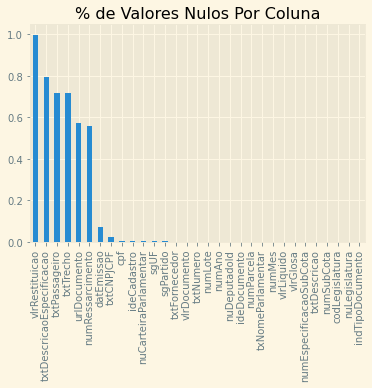

In [157]:
#check for null values

(
    consolidated_df
    .isnull()
    .sum()
    .sort_values(ascending=False)
    / consolidated_df.shape[0]
).plot(kind="bar")
plt.title("% de Valores Nulos Por Coluna")
plt.show()


In [158]:
ano_corrente_df = consolidated_df[consolidated_df["numAno"] == (ano_corrente - 1)]

In [159]:
ano_corrente_df.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2022,0,NaN,NaN,1833951,NaN,NaN,3453,7342370,https://www.camara.leg.br/cota-parlamentar/doc...
1,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÇÕES,...,2022,0,NaN,NaN,1822148,NaN,NaN,2713,7317427,https://www.camara.leg.br/cota-parlamentar/doc...
2,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÇÕES,...,2022,0,NaN,NaN,1825721,NaN,NaN,2713,7324813,https://www.camara.leg.br/cota-parlamentar/doc...
3,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÇÕES,...,2022,0,NaN,NaN,1824104,NaN,NaN,2713,7321395,https://www.camara.leg.br/cota-parlamentar/not...
4,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2022,0,NaN,NaN,1826660,NaN,NaN,2713,7326637,https://www.camara.leg.br/cota-parlamentar/not...


**Agrupamento dos dados para visualização**

In [160]:
a = (
    ano_corrente_df
    .groupby("sgPartido")["vlrDocumento"]
    .sum()
    .sort_values(ascending=False)
    / ano_corrente_df["vlrDocumento"].sum()
)
a.head()

sgPartido
PL       0.142415
PT       0.115782
PP       0.112383
UNIÃO    0.104975
PSD      0.092476
Name: vlrDocumento, dtype: float64

In [161]:
b = (
    ano_corrente_df
    .groupby("sgPartido")["vlrDocumento"]
    .sum()
    /
    ano_corrente_df
    .groupby("sgPartido")["cpf"]
    .nunique()
    
).sort_values(ascending=False)
b.head()

sgPartido
REDE        290090.930000
PATRIOTA    239788.376000
PDT         232044.515789
PT          229593.635000
PTB         222299.516667
dtype: float64

In [162]:
filtro = (
    ano_corrente_df
    .groupby(["txNomeParlamentar"])["vlrDocumento"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(5)
    .iloc[:, 0]
)


c = (
    ano_corrente_df[ano_corrente_df["txNomeParlamentar"].isin(filtro)]
    .groupby(["txNomeParlamentar", "txtDescricao"])["vlrDocumento"]
    .sum()
    .sort_values(ascending=False)
    .unstack()
)

In [163]:
c2 = (
    ano_corrente_df
    .groupby(["txNomeParlamentar"])["vlrDocumento"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

In [164]:
d = (
    consolidated_df
    .groupby("numAno")["vlrDocumento"]
    .sum()
)
d.head()

numAno
2013    1.919581e+08
2014    1.985093e+08
2015    2.162950e+08
2016    2.231938e+08
2017    2.276274e+08
Name: vlrDocumento, dtype: float64

In [165]:
f = (
    ano_corrente_df
    .groupby(["txNomeParlamentar", "sgPartido"])["vlrDocumento"]
    .sum()
    .sort_values(ascending=True)
)
f.head(20)

txNomeParlamentar      sgPartido   
Flordelis              PSD              -771.00
Marcio Alvino          PL                 80.56
Joceval Rodrigues      CIDADANIA         200.00
Alexandre Figueiredo   PSD              2397.25
Antônia Lúcia          REPUBLICANOS     2621.23
Lucas Follador         PSC              2663.61
Aníbal Gomes           UNIÃO            2700.08
Tiago Andrino          PSB              7164.43
Lázaro Botelho         PP              13386.51
Adriana Ventura        NOVO            15634.55
Tiago Mitraud          NOVO            19592.68
Pedro Cunha Lima       PSDB            22662.53
Marco Brasil           PP              30755.48
Paulo Eduardo Martins  PL              33220.82
Paulo Ganime           NOVO            35166.42
Flávia Arruda          PL              35483.76
Sargento Alexandre     PODE            36196.54
Gilson Marques         NOVO            38609.56
Márcio Macêdo          PT              41220.30
Laerte Bessa           PL              41329.65
Name

**Dashboard - Matplotlib**

Text(0.5, 1.0, 'Gastos Mensais - 2022')

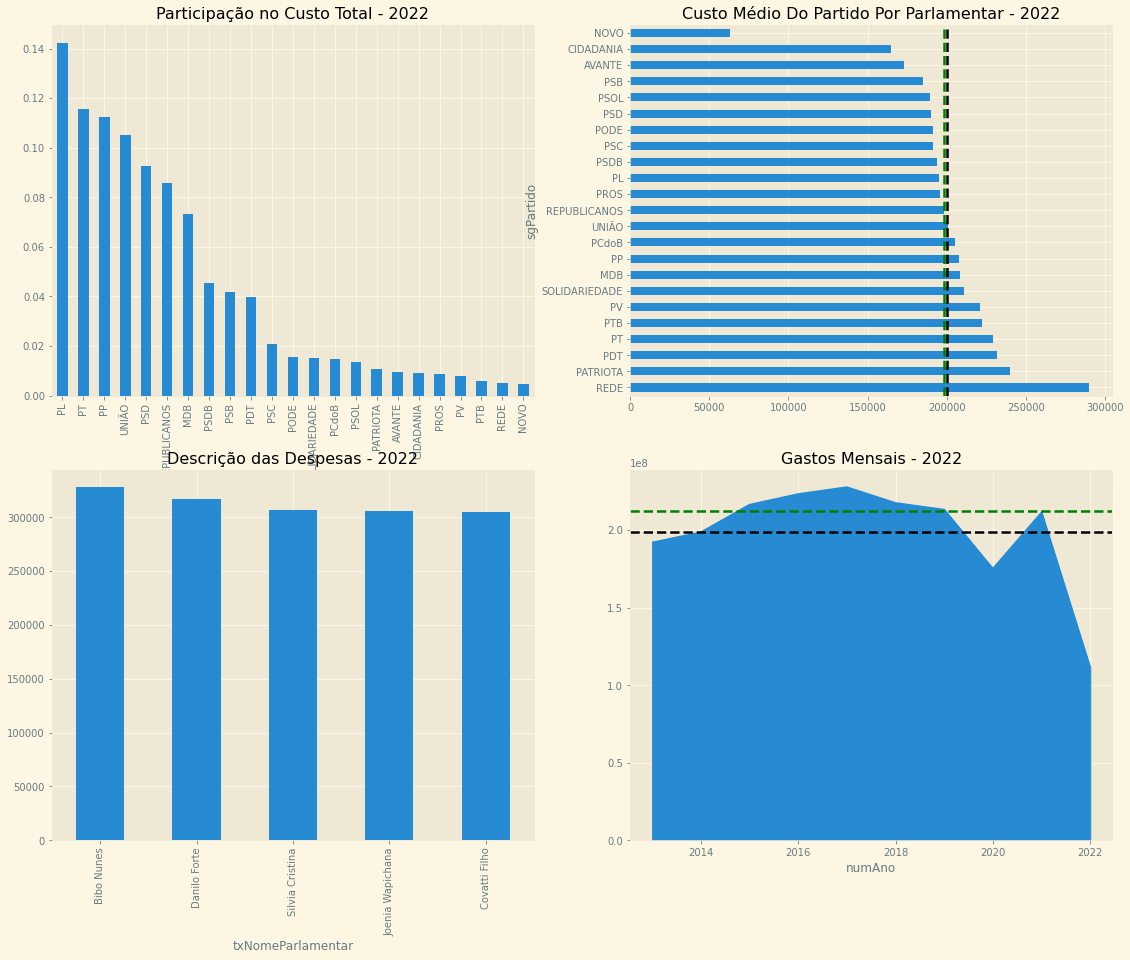

In [166]:
plt.figure(figsize=(19, 15))
plt.style.use('Solarize_Light2')

plt.subplot(2, 2, 1)
a.plot(kind="bar")
plt.title("Participação no Custo Total - " + str(ano_corrente - 1))


plt.subplot(2, 2, 2)
b.plot(kind="barh")
plt.axvline(b.mean(), c="black", ls='--', lw=2.5)
plt.axvline(b.median(), c="green", ls='--', lw=2.5)
plt.title("Custo Médio Do Partido Por Parlamentar - " + str(ano_corrente - 1))

plt.subplot(2, 2, 3)
c2.plot(kind="bar")
plt.title("Descrição das Despesas - " + str(ano_corrente - 1))


plt.subplot(2, 2, 4)
d.plot(kind="area")
plt.axhline(d.mean(), c="black", ls='--', lw=2.5)
plt.axhline(d.median(), c="green", ls='--', lw=2.5)
plt.title("Gastos Mensais - " + str(ano_corrente - 1))

**Gráficos Individuais - Plotly**

In [173]:
fig1 = px.bar(a, title="Participação no Custo Total - " + str(ano_corrente - 1), template="plotly_white")
fig1.update_yaxes(title='%', visible=True, showticklabels=True)
fig1.update_xaxes(title=None, visible=True, showticklabels=True)
fig1.update_layout(showlegend=False)
fig1.show("png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [168]:
fig2 = px.bar(b, orientation='h', template="plotly_dark", title="Custo Médio Do Partido Por Parlamentar - " + str(ano_corrente - 1))
fig2.update_yaxes(title=None, visible=True, showticklabels=True)
fig2.update_xaxes(title=None, visible=True, showticklabels=True)
fig2.update_layout(showlegend=False)
fig2.show()

In [169]:
fig3 = px.bar(c, template="plotly_dark", title="Top 5 Parlamentares, Maior Gasto - "+ str(ano_corrente - 1))
fig3.update_yaxes(title=None, visible=True, showticklabels=True)
fig3.update_xaxes(title=None, visible=True, showticklabels=True)
fig3.update_layout(showlegend=False)
fig3.show()

In [170]:
fig4 = px.area(d, template="plotly_dark", title="Gasto Parlamentar Anual")
fig4.update_yaxes(title=None, visible=True, showticklabels=True)
fig4.update_xaxes(title=None, visible=True, showticklabels=True)
fig4.update_layout(showlegend=False)
fig4.show()